<a href="https://colab.research.google.com/github/farida752/Decision-Trees/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Workshop - Decision Trees
This workshop deals with understanding the working of decision trees.

Loading the dataset

In [76]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import numpy as np

# Loading the iris dataset
iris=datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


df.insert(4,'target',iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Data exploration

In [99]:
#checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


In [100]:
#statistics summary
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [104]:
#finding pairwise correlation of all columns
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


Preprocessing the data

In [77]:
#counting the number of rows that has a null value
num_null = df.isnull().sum().sum()
dupli = df.duplicated().sum().sum()
print("null values count " + str(num_null))
print("dupli values count " + str(dupli))
#drop rows with nan values
df.dropna(axis = 0 , inplace = True)
#drop duplicate rows
df.drop_duplicates()

null values count 0
dupli values count 1


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Split the data into features and labels

In [43]:
# Forming the iris dataframe
y = df[['target']]
print(y)

df.pop('target')
df.head(10)

     target
0         0
1         0
2         0
3         0
4         0
..      ...
145       2
146       2
147       2
148       2
149       2

[150 rows x 1 columns]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Split the data into training set and testing set:

In [44]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(df ,y, 
                            test_size=0.2, random_state=0) 

visualize the Decision Tree

In [45]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-1

In [60]:
# Import necessary libraries for graph viz
!pip install --upgrade scikit-learn==0.20.3
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydotplus

# Function to Visualize the graph
def visualize(dtree):
  dot_data = StringIO()
  export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                  filled=True, rounded=True,
                  special_characters=True)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
  return graph

Evaluating the model Accuracy :

In [93]:
def evaluation(predicted , y_test):
    from sklearn.metrics import accuracy_score, f1_score
    accuracy = accuracy_score(predicted , y_test)
    f1 = f1_score(predicted , y_test , average='weighted')
    print("\n Accuracy:  {:0.3f}.\n".format(accuracy))
    print("\n F1_score:  {:0.3f}.\n".format(f1))
    #calculating precision and reall

    from sklearn.metrics import precision_score , recall_score
    precision = precision_score(predicted , y_test ,average='micro')
    recall = recall_score(predicted , y_test ,average='micro') 
    print("\n Precision:  {:0.3f}.\n".format(precision))
    print("\n Recall:   {:0.3f}.\n".format(recall))
    
    
    from sklearn.metrics import confusion_matrix
    confusion = confusion_matrix(predicted,y_test)
    print("Confusion Matrix:")
    print(confusion)

Tune some of the model param:

In [48]:
#function input is the training data , model , params to tunes  return the best model after tunning
# Import 'make_scorer', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


def fit_model(X, y , model , params):    
    # Create cross-validation sets from the training data
    cv_sets=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=None)
  

    #Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(accuracy_score)
    #Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(estimator=model, param_grid= params, scoring=scoring_fnc,cv=cv_sets)
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    scores = grid.cv_results_.get('mean_test_score')
    for i in params :      
        plt.scatter(x = params[i] ,y = scores)
        plt.show()
    # Return the optimal model after fitting the data
    return grid.best_estimator_

Decision Tree model:

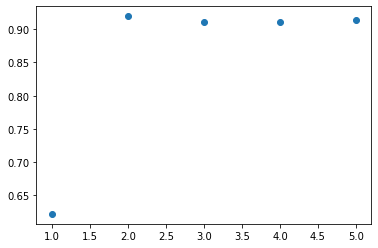

the best depth : 2


In [78]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()

depth_space = np.arange(1,6,1)

#  Create a dictionary for the parameter 'n_estimators' with a range from 10 to 100
params = { 'max_depth':depth_space}

#call gradient decent function to split the data into kfolds and tune the giving params
best_model = fit_model(X_train, y_train, tree_model ,params)
print("the best depth :" , best_model.get_params()['max_depth'])
#Predict the response for test dataset
predicted = best_model.predict(X_test)


Visualize the best model:

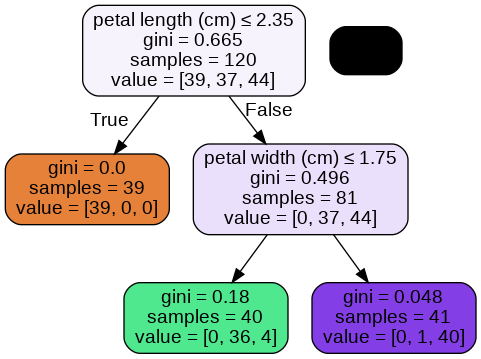

In [79]:
#visualize
graph = visualize(best_model)
graph

Evaluate the best model:

In [94]:
#evaluating
evaluation(predicted ,y_test)


 Accuracy:  0.967.


 F1_score:  0.968.


 Precision:  0.967.


 Recall:   0.967.

Confusion Matrix:
[[11  0  0]
 [ 0 13  1]
 [ 0  0  5]]
